In [2]:
import time 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import datetime
import csv
import undetected_chromedriver as uc
import pandas as pd
import numpy as np


In [18]:
url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_week.csv'

quake_list = pd.read_csv(url)
quake_list

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T17:32:50.659Z,-15.6058,-172.7572,10.000,5.0,mb,72.0,87.0,2.514,1.04,...,2023-02-06T17:52:35.040Z,Samoa Islands region,earthquake,7.27,1.877,0.060,89.0,reviewed,us,us
1,2023-02-06T16:43:29.298Z,37.9616,36.4753,10.000,5.0,mb,126.0,34.0,0.981,0.77,...,2023-02-06T17:36:54.438Z,"6 km SSW of Göksun, Turkey",earthquake,3.30,1.655,0.047,143.0,reviewed,us,us
2,2023-02-06T16:32:11.313Z,36.6111,36.4444,10.000,4.9,mb,51.0,93.0,0.831,0.97,...,2023-02-06T17:32:41.040Z,"14 km NNE of Kırıkhan, Turkey",earthquake,8.01,1.870,0.063,79.0,reviewed,us,us
3,2023-02-06T16:26:39.603Z,38.0304,36.6206,10.000,4.8,mb,68.0,39.0,0.976,0.67,...,2023-02-06T16:45:58.040Z,"10 km E of Göksun, Turkey",earthquake,5.13,1.845,0.065,73.0,reviewed,us,us
4,2023-02-06T16:26:15.509Z,37.9847,36.9072,10.000,4.6,mb,88.0,61.0,0.846,0.58,...,2023-02-06T17:02:26.040Z,"26 km WSW of Ekinözü, Turkey",earthquake,6.30,1.863,0.074,55.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2023-01-31T03:09:56.442Z,-48.8085,121.3105,10.000,4.9,mb,41.0,83.0,16.157,0.74,...,2023-02-01T01:41:06.040Z,western Indian-Antarctic Ridge,earthquake,8.20,1.882,0.092,37.0,reviewed,us,us
127,2023-01-31T00:43:16.360Z,34.8399,14.2541,10.000,4.6,mb,91.0,77.0,5.293,0.64,...,2023-02-01T19:18:42.728Z,"111 km S of Żurrieq, Malta",earthquake,8.74,1.878,0.059,85.0,reviewed,us,us
128,2023-01-30T19:55:26.286Z,34.9660,14.3004,10.000,5.3,mww,108.0,39.0,5.161,0.89,...,2023-02-04T22:19:08.544Z,"97 km S of Żurrieq, Malta",earthquake,7.91,1.844,0.039,62.0,reviewed,us,us
129,2023-01-30T19:15:44.077Z,37.8452,142.1470,33.531,4.5,mb,49.0,135.0,3.058,1.19,...,2023-01-30T22:34:53.054Z,"off the east coast of Honshu, Japan",earthquake,8.27,6.057,0.104,27.0,reviewed,us,us


In [19]:
quake_list['time'] = pd.to_datetime(quake_list['time']).dt.round('S')
quake_list


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06 17:32:51+00:00,-15.6058,-172.7572,10.000,5.0,mb,72.0,87.0,2.514,1.04,...,2023-02-06T17:52:35.040Z,Samoa Islands region,earthquake,7.27,1.877,0.060,89.0,reviewed,us,us
1,2023-02-06 16:43:29+00:00,37.9616,36.4753,10.000,5.0,mb,126.0,34.0,0.981,0.77,...,2023-02-06T17:36:54.438Z,"6 km SSW of Göksun, Turkey",earthquake,3.30,1.655,0.047,143.0,reviewed,us,us
2,2023-02-06 16:32:11+00:00,36.6111,36.4444,10.000,4.9,mb,51.0,93.0,0.831,0.97,...,2023-02-06T17:32:41.040Z,"14 km NNE of Kırıkhan, Turkey",earthquake,8.01,1.870,0.063,79.0,reviewed,us,us
3,2023-02-06 16:26:40+00:00,38.0304,36.6206,10.000,4.8,mb,68.0,39.0,0.976,0.67,...,2023-02-06T16:45:58.040Z,"10 km E of Göksun, Turkey",earthquake,5.13,1.845,0.065,73.0,reviewed,us,us
4,2023-02-06 16:26:16+00:00,37.9847,36.9072,10.000,4.6,mb,88.0,61.0,0.846,0.58,...,2023-02-06T17:02:26.040Z,"26 km WSW of Ekinözü, Turkey",earthquake,6.30,1.863,0.074,55.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2023-01-31 03:09:56+00:00,-48.8085,121.3105,10.000,4.9,mb,41.0,83.0,16.157,0.74,...,2023-02-01T01:41:06.040Z,western Indian-Antarctic Ridge,earthquake,8.20,1.882,0.092,37.0,reviewed,us,us
127,2023-01-31 00:43:16+00:00,34.8399,14.2541,10.000,4.6,mb,91.0,77.0,5.293,0.64,...,2023-02-01T19:18:42.728Z,"111 km S of Żurrieq, Malta",earthquake,8.74,1.878,0.059,85.0,reviewed,us,us
128,2023-01-30 19:55:26+00:00,34.9660,14.3004,10.000,5.3,mww,108.0,39.0,5.161,0.89,...,2023-02-04T22:19:08.544Z,"97 km S of Żurrieq, Malta",earthquake,7.91,1.844,0.039,62.0,reviewed,us,us
129,2023-01-30 19:15:44+00:00,37.8452,142.1470,33.531,4.5,mb,49.0,135.0,3.058,1.19,...,2023-01-30T22:34:53.054Z,"off the east coast of Honshu, Japan",earthquake,8.27,6.057,0.104,27.0,reviewed,us,us


In [21]:
#only show quake list in place coloum that contains "Turkey" 
quake_list_turkey = quake_list[quake_list['place'].str.contains("Turkey")].reset_index(drop=True)
quake_list_turkey
#reset index


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06 16:43:29+00:00,37.9616,36.4753,10.000,5.0,mb,126.0,34.0,0.981,0.77,...,2023-02-06T17:36:54.438Z,"6 km SSW of Göksun, Turkey",earthquake,3.30,1.655,0.047,143.0,reviewed,us,us
1,2023-02-06 16:32:11+00:00,36.6111,36.4444,10.000,4.9,mb,51.0,93.0,0.831,0.97,...,2023-02-06T17:32:41.040Z,"14 km NNE of Kırıkhan, Turkey",earthquake,8.01,1.870,0.063,79.0,reviewed,us,us
2,2023-02-06 16:26:40+00:00,38.0304,36.6206,10.000,4.8,mb,68.0,39.0,0.976,0.67,...,2023-02-06T16:45:58.040Z,"10 km E of Göksun, Turkey",earthquake,5.13,1.845,0.065,73.0,reviewed,us,us
3,2023-02-06 16:26:16+00:00,37.9847,36.9072,10.000,4.6,mb,88.0,61.0,0.846,0.58,...,2023-02-06T17:02:26.040Z,"26 km WSW of Ekinözü, Turkey",earthquake,6.30,1.863,0.074,55.0,reviewed,us,us
4,2023-02-06 15:33:33+00:00,38.1610,38.1869,8.774,5.2,mb,94.0,66.0,1.255,0.94,...,2023-02-06T15:49:49.040Z,"15 km NNW of Çelikhan, Turkey",earthquake,3.93,4.267,0.061,88.0,reviewed,us,us
5,2023-02-06 15:14:34+00:00,37.8679,37.7388,10.000,5.3,mb,108.0,55.0,0.812,0.73,...,2023-02-06T15:34:52.040Z,Central Turkey,earthquake,4.92,1.838,0.046,156.0,reviewed,us,us
6,2023-02-06 14:57:47+00:00,37.9248,37.9099,10.000,4.5,mb,25.0,108.0,1.867,0.59,...,2023-02-06T17:54:08.040Z,central Turkey,earthquake,6.66,1.933,0.135,16.0,reviewed,us,us
7,2023-02-06 14:29:59+00:00,37.9949,36.5123,10.000,4.7,mb,39.0,95.0,0.991,1.11,...,2023-02-06T17:49:03.040Z,"3 km SSE of Göksun, Turkey",earthquake,3.37,1.888,0.086,41.0,reviewed,us,us
8,2023-02-06 13:44:52+00:00,37.9272,37.5076,17.336,5.0,mb,76.0,76.0,0.790,0.52,...,2023-02-06T14:04:16.040Z,"7 km SE of Nurhak, Turkey",earthquake,4.95,1.715,0.061,84.0,reviewed,us,us
9,2023-02-06 13:39:11+00:00,37.5953,36.9620,10.000,5.1,mb,45.0,60.0,0.466,0.90,...,2023-02-06T14:23:31.040Z,"3 km ENE of Kahramanmaraş, Turkey",earthquake,4.65,1.855,0.104,30.0,reviewed,us,us


In [23]:
quake_list_turkey['time_turkey_local'] = quake_list_turkey['time'] + pd.Timedelta(hours=3)

<AxesSubplot: title={'center': 'Turkey Earthquake'}, xlabel='time_turkey_local', ylabel='mag'>

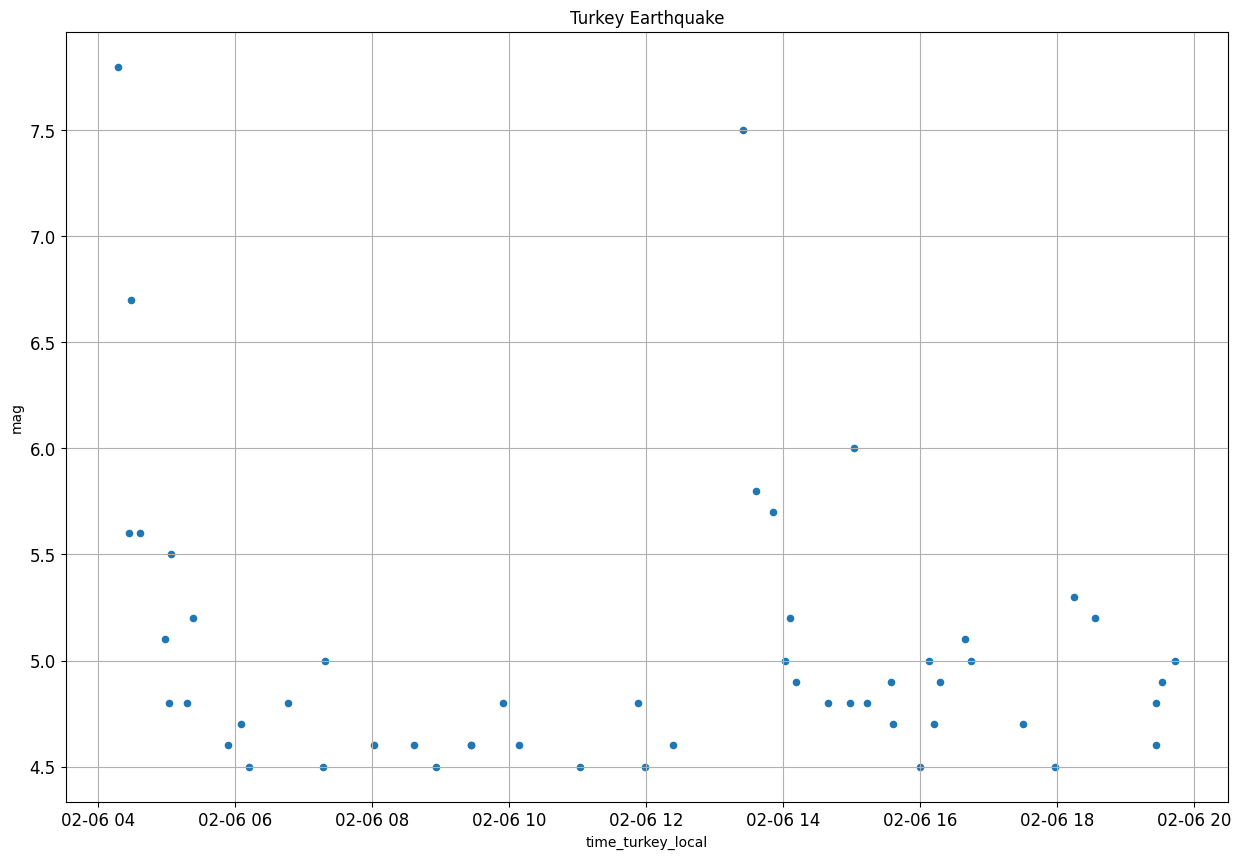

In [24]:
#plot a chart to show the time of the earthquake and the magnitude
quake_list_turkey.plot(x='time_turkey_local', y='mag', kind='scatter', title='Turkey Earthquake', figsize=(15, 10), grid=True, fontsize=12)